<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-I/blob/main/AGUJA_DE_BUFFON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENTO DE LA AGUJA DE BUFFON
### Análisis Analítico
El experimento de la aguja de Buffon es un experimento de probabilidad clásico que fue propuesto por Georges-Louis Leclerc, Comte de Buffon, en el siglo XVIII. Es uno de los primeros problemas de probabilidad geométrica y proporciona un método para estimar el valor de π.

### Descripción del Experimento
Se considera una superficie con líneas paralelas separadas por una distancia $D$. Se lanza una aguja de longitud $L$ sobre esta superficie, y se observa si la aguja cruza una de las líneas.
### Probabilidad de Cruce
Para calcular la probabilidad de que la aguja cruce una línea, necesitamos considerar dos variables aleatorias:


1.   La distancia desde el centro de la aguja a la línea más cercana, $x$.
2.   El ángulo que forma la aguja con las líneas paralelas, $θ$.

#### Variables Aleatorias


*   $x$ es una variable aleatoria uniformemente distribuida en el intervalo $[0,D/2]$.
*   $θ$ es una variable aleatoria uniformemente distribuida en el intervalo $[0,π/2]$.

### Condición de Cruce
La aguja cruza una línea si la distancia desde el centro de la aguja a la línea más cercana es menor o igual que la proyección de la mitad de la longitud de la aguja sobre la línea perpendicular a las líneas paralelas:
$$x≤\frac{L}{2}sin(θ)$$
### Cálculo de la Probabilidad
Para encontrar la probabilidad $P$ de que la aguja cruce una línea, necesitamos calcular la siguiente integral doble:
$$P=\frac{1}{\frac{D}{2}⋅\frac{π}{2}}\int_{0}^{D/2}\int_{0}^{π/2}1\left (x≤\frac{L}{2}sin(θ)  \right )dθdx$$
Donde $1$ es la función indicadora que vale 1 cuando la condición se cumple y 0 en caso contrario.

La integral se puede simplificar ya que la función indicadora solo depende de $θ$:
$$P=\frac{2}{Dπ}\int_{0}^{D/2}\int_{0}^{π/2}1\left (x≤\frac{L}{2}sin(θ)  \right )dθdx$$
Cambiando el orden de integración:
$$P=\frac{2}{Dπ}\int_{0}^{π/2}\int_{0}^{D/2}1\left (x≤\frac{L}{2}sin(θ)  \right )dxdθ$$
La función indicadora $1\left (x≤\frac{L}{2}sin(θ)  \right )$ será 1 cuando $x≤\frac{L}{2}sin(θ)$ y 0 en caso contrario. Por lo tanto:
$$P=\frac{2}{Dπ}\int_{0}^{π/2}min\left(\frac{D}{2},\frac{L}{2}sin(θ)\right)dθ$$
Para $L≤D$, la integral se convierte en:
$$P=\frac{2}{Dπ}\int_{0}^{π/2}\frac{L}{2}sin(θ)dθ$$
Evaluando la integral:
$$P=\frac{L}{Dπ}\left [-cos(θ)\right ]_0^{π/2}=\frac{L}{Dπ}(1-0)=\frac{2L}{Dπ}$$
Por lo tanto, la probabilidad de que la aguja cruce una línea es:
$$P=\frac{2L}{Dπ}$$
### Estimación de π
Podemos usar la fórmula anterior para estimar π realizando un experimento y contando el número de veces que la aguja cruza una línea. Si lanzamos la aguja $n$ veces y observamos que cruza una línea $x$ veces, podemos estimar $π$ como:
$$π≈\frac{2L⋅n}{D⋅x}$$
### En resumen


*   Probabilidad de cruce: $P=\frac{2L}{Dπ}$
*   Estimación de π: $π≈\frac{2L⋅n}{D⋅x}$

## EJERCICIO
### Parámetros del Ejercicio


*   Longitud de la aguja $L=1.0$
*   Distancia entre las líneas $D=1.5$
*   Número de lanzamientos $n=10000$
### Cálculo de la Probabilidad
Para los valores dados:
$$P=\frac{2⋅1⋅0}{1.5⋅π}=\frac{2}{1.5π}=\frac{2}{3π}$$
### Estimación de π
Podemos usar esta probabilidad para estimar π realizando el experimento. Si lanzamos la aguja $n=10000$ veces y contamos cuántas veces cruza una línea, podemos estimar π como:
$$π≈\frac{2L⋅n}{D⋅x}≈\frac{2⋅1⋅10000}{1.5⋅x}≈\frac{20000}{1.5⋅x}$$
donde $x$ es el número de veces que la aguja cruza una línea.

# Por Simulación


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lanzar_aguja(L, D, n):
    cruza_linea = 0

    for _ in range(n):
        x = np.random.uniform(0, D / 2)  # Distancia del centro de la aguja a la línea más cercana
        theta = np.random.uniform(0, np.pi / 2)  # Ángulo de la aguja con la línea

        if x <= (L / 2) * np.sin(theta):
            cruza_linea += 1

    return cruza_linea

def estimar_pi(L, D, n):
    cruza_linea = lanzar_aguja(L, D, n)
    pi_est = (2 * L * n) / (D * cruza_linea)
    return pi_est, cruza_linea

# Parámetros del experimento
L = 1.0  # Longitud de la aguja
D = 1.5  # Distancia entre las líneas
n = 10000  # Número de lanzamientos

# Estimar π mediante simulación
pi_estimado, cruza_linea = estimar_pi(L, D, n)

# Mostrar resultados
print(f"Número de lanzamientos: {n}")
print(f"Número de veces que la aguja cruza una línea: {cruza_linea}")
print(f"Estimación de π: {pi_estimado}")

Número de lanzamientos: 10000
Número de veces que la aguja cruza una línea: 4245
Estimación de π: 3.1409501374165685


# VISUALIZACION DE RESULTADOS

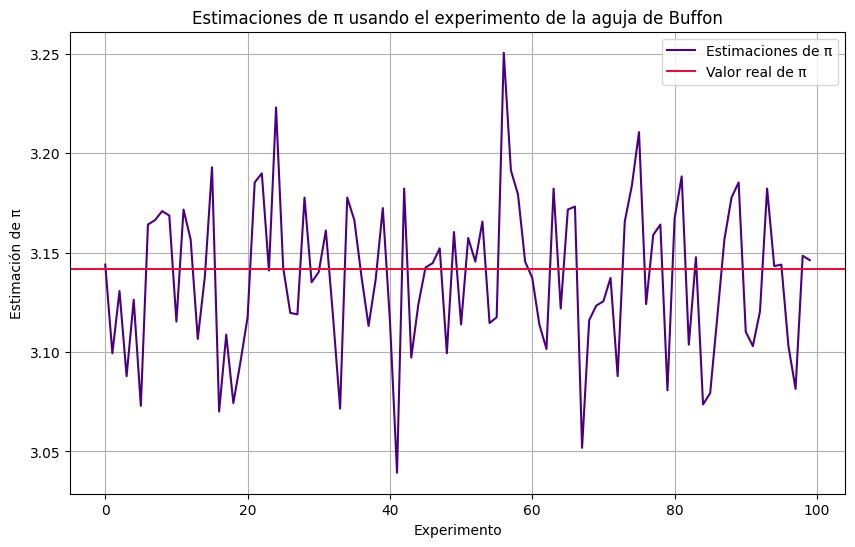

In [16]:
# Realizar múltiples experimentos
experimentos = 100
estimaciones_pi = [estimar_pi(L, D, n)[0] for _ in range(experimentos)]

# Graficar las estimaciones de π
plt.figure(figsize=(10, 6))
plt.plot(range(experimentos), estimaciones_pi, label='Estimaciones de π', color='indigo')
plt.axhline(y=np.pi, color='crimson', linestyle='-', label='Valor real de π')
plt.xlabel('Experimento')
plt.ylabel('Estimación de π')
plt.title('Estimaciones de π usando el experimento de la aguja de Buffon')
plt.legend()
plt.grid(True)
plt.show()